# PM2.5 (Fine Particles) Analysis of NYC Neighborhoods

Using pandas, matplotlib, geopandas and Power BI, we will be performing an in-depth analysis of particle pollution in New York City.

### Overview
(Information shared from the New York State Department of Health website: https://www.health.ny.gov/environmental/indoors/air/pmq_a.htm)

What is fine particle pollution?

Fine Particles or particulate matter 2.5 (PM2.5) refer to tiny particles or droplets in the air that are 2 ½ microns or less in width. The largest PM2.5 particles are about 30-times smaller than a human hair. The smaller particles are so small that several thousand of them could fit on the period at the end of this sentence.

Why does particle pollution increase the risk of health effects?

Fine particles in the air (measured as PM2.5) are so small that they can travel deeply into the respiratory tract, reaching the lungs, causing short-term health effects such as eye, nose, throat and lung irritation, coughing, sneezing, runny nose, and shortness of breath. Exposure can also affect heart and lung function, worsening medical conditions like heart disease and asthma, and increase the risk for heart attacks. Scientific studies have linked increases in daily PM2.5 exposure with higher cardiovascular and respiratory hospital admissions, emergency department visits, and deaths. Studies also suggest that long-term exposure to fine particles causes increased mortality from heart disease and may be associated with increased rates of chronic bronchitis, reduced lung function, and lung cancer. People with heart and breathing problems, pregnant women, children, and older adults may be particularly sensitive to particle pollution.

Is there an air quality standard for PM2.5 in outdoor air?

Environmental Protection Agency (EPA) established National Ambient Air Quality Standards for PM2.5. National Ambient Air Standards are established to be protective of public health. The short-term standard (24-hour or daily average) is 35 micrograms per cubic meter of air (µg/m3) and the long-term standard (annual average) is 9 µg/m3.

Outdoor and indoor sources of particle pollution:

Outdoor sources include vehicle exhaust, burning wood, gas and other fuels, and fires. Particle pollution can also travel long distances from its source; for example from wildfires hundreds of miles away. Outdoor particle pollution levels are more likely to be higher on days with little or no wind or air mixing.

Common indoor sources are tobacco smoke, broiling or frying food, burning candles or oil lamps, fireplaces, and fuel-burning space heaters.

### Objective

Our main objectives for this analysis are:
1. Learn more about the dataset we are working with and extract PM2.5 related data for our analysis.
2. Clean and pre-process it for exploration and visualization.
3. Explore the data and ask some questions: what are the highs and lows? What has been the general trend since the last decade? Are we seeing a decline in PM2.5 levels in NYC or is the situation getting worse? are PM2.5 levels higher in the summer as opposed to year-round averages?
4. Visualize data using matplotlib, geopandas and Power BI.
5. Use health related data of NYC citizens and identify trends and correlations.
6. Offer recommendations and actions for the future.

### The Data

The dataset can be found here at NYC Open Data: https://data.cityofnewyork.us/Environment/Air-Quality/c3uy-2p5r/about_data
The shapefile can be found here: https://www.nyc.gov/site/doh/data/data-sets/maps-gis-data-files-for-download.page

It contains information of various indicators, the units they are measured in, the neighborhoods they were measured for and the values of those indicators.

Note: The time periods for most of the data dates back to 2009 and the latest file has data for the year 2022. It isn't the latest year but we will analyze it and offer recommendations like we would if we were in 2022.

### Importing the datasets, getting familiar with them and cleaning up the data

In [1]:
# Importing the required libraries
import pandas as pd # For DataFrames, Cleaning and Analysis
import matplotlib.pyplot as plt # For Plotting Graphs
import geopandas as gpd # For Generating Heatmaps

In [2]:
# Read the CSV File and the shapefile
file = r"D:\MyFiles\Coding Projects\Data Files\Air_Quality.csv"
map_file = r"D:\MyFiles\Coding Projects\Saved Files\NYC UHF 42 Shapefiles\UHF_42_DOHMH_2009\UHF_42_DOHMH_2009.shp"

In [3]:
# Load to DataFrames
nyc_map = gpd.read_file(map_file)
df = pd.read_csv(file)

In [4]:
# Preview the data in the Air Quality DataFrame
df.head(10)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN
5,177910,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Summer 2012,06/01/2012,10.0,NaN
6,177952,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Summer 2013,06/01/2013,9.8,NaN
7,177973,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2013,06/01/2013,9.8,NaN
8,177931,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2012,06/01/2012,9.6,NaN
9,742274,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,410.0,Rockaways,Summer 2021,06/01/2021,7.2,NaN


In [5]:
# Info about the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


,Unique ID,Indicator ID,Geo Join ID,Data Value,Message
count,18025.000000,18025.000000,1.801600e+04,18025.000000,0.0
mean,426387.692705,434.830180,5.906303e+05,21.428616,NaN
std,250489.450630,115.852371,7.769549e+06,23.999345,NaN
min,121644.000000,365.000000,1.000000e+00,0.000000,NaN
25%,175303.000000,365.000000,2.020000e+02,8.900000,NaN
50%,410803.000000,375.000000,3.030000e+02,15.200000,NaN
75%,649893.000000,386.000000,4.040000e+02,26.700000,NaN
max,828353.000000,661.000000,1.051061e+08,424.700000,NaN


In [6]:
# Find NaN values in DF
null_values_count = df.isnull().sum()

null_values_count[:]

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

Observations related to the dataset:
1. 18025 rows and 12 columns.
2. There are multiple geographic types used such as CD and UHF 42 etc. which point to similar areas in NYC. Which geography type we use is up to us.
3. We have a column for unique identifiers for each entry.
4. Indicator IDs can be used to easily select specific indicators.
5. We have missing values in Geo Join ID, Geo Place Name and Message columns. The entirety of Message column has no values.
6. Time period is wrongly classified as object.

We will be performing the following actions: 
1. Convert Geo Join ID into an integer since they are: "Identifiers of the neighborhood geographic area, used for joining to mapping geography files to make thematic maps"
2. We'll be using UHF geography type for this project, so all the rows that have the other geo types will be dropped.
3. Drop Message column.
4. Rearrange and rename columns.

In [7]:
# Drop "Message" column
df = df.drop(columns='Message')

# Fill NaA values and change data type 
df['Geo Join ID'] = df['Geo Join ID'].fillna(0).astype('int64')
#df_copy = df.copy()

# Drop all excepy UHF 42 ID rows 
drop_geotype = ['UHF34', 'Borough', 'CD', 'Citywide']
df = df[~df['Geo Type Name'].isin(drop_geotype)].copy() # only keeping UHF 42

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7140 entries, 0 to 18024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       7140 non-null   int64  
 1   Indicator ID    7140 non-null   int64  
 2   Name            7140 non-null   object 
 3   Measure         7140 non-null   object 
 4   Measure Info    7140 non-null   object 
 5   Geo Type Name   7140 non-null   object 
 6   Geo Join ID     7140 non-null   int64  
 7   Geo Place Name  7140 non-null   object 
 8   Time Period     7140 non-null   object 
 9   Start_Date      7140 non-null   object 
 10  Data Value      7140 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 669.4+ KB


In [9]:
df.head(10)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409,Southeast Queens,2015,01/01/2015,0.3
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409,Southeast Queens,Annual Average 2012,12/01/2011,8.0
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409,Southeast Queens,Summer 2022,06/01/2022,6.1
5,177910,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209,Bensonhurst - Bay Ridge,Summer 2012,06/01/2012,10.0
6,177952,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209,Bensonhurst - Bay Ridge,Summer 2013,06/01/2013,9.8
7,177973,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409,Southeast Queens,Summer 2013,06/01/2013,9.8
8,177931,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409,Southeast Queens,Summer 2012,06/01/2012,9.6
9,742274,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,410,Rockaways,Summer 2021,06/01/2021,7.2


In [10]:
# Checking null values again
null_values_count = df.isnull().sum()

null_values_count[:]

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [11]:
# Rename columns for uniformity and better understanding
df.rename(columns={'Unique ID' : 'unique_id',
                   'Indicator ID': 'indicator_id',
                   'Name': 'indicator_name',
                   'Measure': 'measure',
                   'Measure Info': 'unit',
                   'Geo Join ID': 'uhf_id',
                   'Geo Place Name': 'neighborhood',
                   'Time Period': 'time_period',
                   'Start_Date': 'start_date',
                   'Data Value': 'value'
                    }, inplace=True)

#Dropping Geo Type Name column since we will only be working with UHF 42
df.drop(columns='Geo Type Name', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7140 entries, 0 to 18024
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_id       7140 non-null   int64  
 1   indicator_id    7140 non-null   int64  
 2   indicator_name  7140 non-null   object 
 3   measure         7140 non-null   object 
 4   unit            7140 non-null   object 
 5   uhf_id          7140 non-null   int64  
 6   neighborhood    7140 non-null   object 
 7   time_period     7140 non-null   object 
 8   start_date      7140 non-null   object 
 9   value           7140 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 613.6+ KB


In [12]:
df.head()

,unique_id,indicator_id,indicator_name,measure,unit,uhf_id,neighborhood,time_period,start_date,value
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,409,Southeast Queens,2015,01/01/2015,0.3
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,209,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,209,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,409,Southeast Queens,Annual Average 2012,12/01/2011,8.0
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,409,Southeast Queens,Summer 2022,06/01/2022,6.1


In [13]:
# Display indicator names along with their IDs
df_selected = df[['indicator_id','indicator_name','measure']]
df_selected.drop_duplicates(subset='indicator_id').sort_values(by='indicator_id')

,indicator_id,indicator_name,measure
2,365,Fine particles (PM 2.5),Mean
26,375,Nitrogen dioxide (NO2),Mean
723,386,Ozone (O3),Mean
10100,639,Deaths due to PM2.5,Estimated annual rate (age 30+)
0,640,Boiler Emissions- Total SO2 Emissions,Number per km2
4553,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2
4489,642,Boiler Emissions- Total NOx Emissions,Number per km2
745,643,Annual vehicle miles traveled,Million miles
11144,644,Annual vehicle miles traveled (cars),Million miles
11130,645,Annual vehicle miles traveled (trucks),Million miles


In [14]:
# Display neighborhoods along with their respective UHF 42 IDs
df_neighborhoods = df[['uhf_id','neighborhood']]
df_neighborhoods.drop_duplicates(subset='uhf_id').sort_values(by='uhf_id')

,uhf_id,neighborhood
112,101,Kingsbridge - Riverdale
361,102,Northeast Bronx
307,103,Fordham - Bronx Pk
38,104,Pelham - Throgs Neck
293,105,Crotona -Tremont
244,106,High Bridge - Morrisania
73,107,Hunts Point - Mott Haven
102,201,Greenpoint
358,202,Downtown - Heights - Slope
297,203,Bedford Stuyvesant - Crown Heights


We can see here that we have data for 42 neighborhoods and for a variety of indicators. Since we are currently concerned with PM2.5 (fine particles) pollution, we'll extract that information and save it into a new dataframe.

### Creating fine particles DataFrame

In [15]:
# Create a new DataFrame with PM 2.5 (fine particles) data 
df_pm25 = df[(df['indicator_id'] == 365)]
df_pm25.head()

,unique_id,indicator_id,indicator_name,measure,unit,uhf_id,neighborhood,time_period,start_date,value
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,209,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,409,Southeast Queens,Annual Average 2012,12/01/2011,8.0
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,409,Southeast Queens,Summer 2022,06/01/2022,6.1
5,177910,365,Fine particles (PM 2.5),Mean,mcg/m3,209,Bensonhurst - Bay Ridge,Summer 2012,06/01/2012,10.0
6,177952,365,Fine particles (PM 2.5),Mean,mcg/m3,209,Bensonhurst - Bay Ridge,Summer 2013,06/01/2013,9.8


### Cleaning fine particles DataFrame

Since we have no use for unique ID, and already know the indicator name, measure and unit used, we will drop these columns. And for the sake of clarity, we will rename the values column. 

In [16]:
# Drop unnecessary columns and rename value column
df_pm25 = df_pm25.drop(columns=['unique_id','indicator_id','indicator_name','measure','unit'])
df_pm25= df_pm25.rename(columns={'value':'pm_2.5_value'})

In [17]:
df_pm25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1764 entries, 2 to 17790
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uhf_id        1764 non-null   int64  
 1   neighborhood  1764 non-null   object 
 2   time_period   1764 non-null   object 
 3   start_date    1764 non-null   object 
 4   pm_2.5_value  1764 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 82.7+ KB


In [18]:
df_pm25.head(30)

,uhf_id,neighborhood,time_period,start_date,pm_2.5_value
2,209,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6
3,409,Southeast Queens,Annual Average 2012,12/01/2011,8.0
4,409,Southeast Queens,Summer 2022,06/01/2022,6.1
5,209,Bensonhurst - Bay Ridge,Summer 2012,06/01/2012,10.0
6,209,Bensonhurst - Bay Ridge,Summer 2013,06/01/2013,9.8
7,409,Southeast Queens,Summer 2013,06/01/2013,9.8
8,409,Southeast Queens,Summer 2012,06/01/2012,9.6
9,410,Rockaways,Summer 2021,06/01/2021,7.2
10,209,Bensonhurst - Bay Ridge,Annual Average 2013,12/01/2012,8.2
11,210,Coney Island - Sheepshead Bay,Annual Average 2013,12/01/2012,8.1


The time_period column tells us both the year and whether the time period is annual, summer or winter. We will extract the year and period for all and assign them to their respective columns. We'll name the column with year as "year" and the time period as "period".

In [19]:
# Extracting years and assigning time periods using the information in time_period column
df_pm25['year'] = df_pm25['time_period'].str.extract(r'(\d{4})')
winter_years = df_pm25['time_period'].str.extract(r'Winter (\d{4})-(\d{2})')
df_pm25['year'] = df_pm25['year'].fillna(winter_years[0])
df_pm25['period'] = 'Unknown'
df_pm25.loc[df_pm25['time_period'].str.contains('Annual Average'), 'period'] = 'Annual'
df_pm25.loc[df_pm25['time_period'].str.contains('Summer'), 'period'] = 'Summer'
df_pm25.loc[df_pm25['time_period'].str.contains('Winter'), 'period'] = 'Winter'
df_pm25 = df_pm25.drop(columns=['time_period'])

In [20]:
# Preview the data to see the changes
df_pm25.head()

,uhf_id,neighborhood,start_date,pm_2.5_value,year,period
2,209,Bensonhurst - Bay Ridge,12/01/2011,8.6,2012,Annual
3,409,Southeast Queens,12/01/2011,8.0,2012,Annual
4,409,Southeast Queens,06/01/2022,6.1,2022,Summer
5,209,Bensonhurst - Bay Ridge,06/01/2012,10.0,2012,Summer
6,209,Bensonhurst - Bay Ridge,06/01/2013,9.8,2013,Summer


In [21]:
df_pm25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1764 entries, 2 to 17790
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uhf_id        1764 non-null   int64  
 1   neighborhood  1764 non-null   object 
 2   start_date    1764 non-null   object 
 3   pm_2.5_value  1764 non-null   float64
 4   year          1764 non-null   object 
 5   period        1764 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 96.5+ KB


In [22]:
# Cleaning and changing dtypes
df_pm25['year'] = df_pm25['year'].astype(int)
df_pm25['start_date'] = pd.to_datetime(df['start_date'], format='%m/%d/%Y')

In [23]:
df_pm25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1764 entries, 2 to 17790
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uhf_id        1764 non-null   int64         
 1   neighborhood  1764 non-null   object        
 2   start_date    1764 non-null   datetime64[ns]
 3   pm_2.5_value  1764 non-null   float64       
 4   year          1764 non-null   int64         
 5   period        1764 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 96.5+ KB


In [24]:
# Rearranging the columns
newcols = ['uhf_id','neighborhood','pm_2.5_value','year','period','start_date']
df_pm25 = df_pm25.reindex(columns=newcols)
df_pm25.head()

,uhf_id,neighborhood,pm_2.5_value,year,period,start_date
2,209,Bensonhurst - Bay Ridge,8.6,2012,Annual,2011-12-01
3,409,Southeast Queens,8.0,2012,Annual,2011-12-01
4,409,Southeast Queens,6.1,2022,Summer,2022-06-01
5,209,Bensonhurst - Bay Ridge,10.0,2012,Summer,2012-06-01
6,209,Bensonhurst - Bay Ridge,9.8,2013,Summer,2013-06-01


### Exploring fine particles data

In [25]:
# Choosing a neighborhood and displaying their annual pm 2.5 values from the earliest year to the latest
df_pm25[(df_pm25['uhf_id'] == 101) & (df_pm25['period'] == 'Annual')].sort_values(by='year')

,uhf_id,neighborhood,pm_2.5_value,year,period,start_date
8802,101,Kingsbridge - Riverdale,11.0,2009,Annual,2008-12-01
8438,101,Kingsbridge - Riverdale,10.1,2010,Annual,2009-12-01
6351,101,Kingsbridge - Riverdale,10.7,2011,Annual,2010-12-01
6667,101,Kingsbridge - Riverdale,9.3,2012,Annual,2011-12-01
13666,101,Kingsbridge - Riverdale,8.9,2013,Annual,2012-12-01
3384,101,Kingsbridge - Riverdale,9.0,2014,Annual,2013-12-01
8806,101,Kingsbridge - Riverdale,9.2,2015,Annual,2015-01-01
3165,101,Kingsbridge - Riverdale,7.5,2016,Annual,2015-12-31
3775,101,Kingsbridge - Riverdale,7.4,2017,Annual,2017-01-01
112,101,Kingsbridge - Riverdale,7.0,2018,Annual,2018-01-01


A quick look at this shows us that the (annual) average PM 2.5 values for this neighborhood have been decreasing over the years.

Now let's take a look at the shapefile.

In [26]:
nyc_map.head()

,OBJECTID,UHFCODE,SHAPE_Leng,SHAPE_Area,UHF_NEIGH,BOROUGH,geometry
0,1,0.0,207587.595627,2.764099e+08,None,N/A,"MULTIPOLYGON (((1052698.331 161778.389, 105230..."
1,2,101.0,57699.154353,1.332914e+08,Kingsbridge - Riverdale,Bronx,"POLYGON ((1017992.893 269222.964, 1017812 2684..."
2,3,102.0,88219.319109,1.813708e+08,Northeast Bronx,Bronx,"POLYGON ((1025012.99 270794.26, 1025061.481 27..."
3,4,103.0,59711.871991,1.407724e+08,Fordham - Bronx Park,Bronx,"POLYGON ((1023994.48 261065.967, 1023885.806 2..."
4,5,104.0,250903.372273,3.865737e+08,Pelham - Throgs Neck,Bronx,"MULTIPOLYGON (((1017075.039 237316.182, 101707..."


Looking at the shapefile, we see that in the polygons column is a collection of geometric data for each neighborhood. We will use geopandas to generate a map using this information. 

The latest annual averages that we have for NYC neighborhoods as per the dataset is 2022. Let's merge the PM 2.5 dataframe with the shapefile dataframe to create a new dataframe that has both location data for each neighborhood and PM 2.5 data. We will use this new dataframe to generate a heatmap for annual PM 2.5 average for each neighborhood for the year 2022. 

### Working with the shapefile

In [27]:
# Looking at dataframe info
nyc_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    43 non-null     int32   
 1   UHFCODE     43 non-null     float64 
 2   SHAPE_Leng  43 non-null     float64 
 3   SHAPE_Area  43 non-null     float64 
 4   UHF_NEIGH   42 non-null     object  
 5   BOROUGH     43 non-null     object  
 6   geometry    43 non-null     geometry
dtypes: float64(3), geometry(1), int32(1), object(2)
memory usage: 2.3+ KB


In [28]:
# Changing UHFCODE to type int
nyc_map['UHFCODE'] = nyc_map['UHFCODE'].astype(int)

In [29]:
nyc_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    43 non-null     int32   
 1   UHFCODE     43 non-null     int64   
 2   SHAPE_Leng  43 non-null     float64 
 3   SHAPE_Area  43 non-null     float64 
 4   UHF_NEIGH   42 non-null     object  
 5   BOROUGH     43 non-null     object  
 6   geometry    43 non-null     geometry
dtypes: float64(2), geometry(1), int32(1), int64(1), object(2)
memory usage: 2.3+ KB


In [30]:
nyc_map.head()

,OBJECTID,UHFCODE,SHAPE_Leng,SHAPE_Area,UHF_NEIGH,BOROUGH,geometry
0,1,0,207587.595627,2.764099e+08,None,N/A,"MULTIPOLYGON (((1052698.331 161778.389, 105230..."
1,2,101,57699.154353,1.332914e+08,Kingsbridge - Riverdale,Bronx,"POLYGON ((1017992.893 269222.964, 1017812 2684..."
2,3,102,88219.319109,1.813708e+08,Northeast Bronx,Bronx,"POLYGON ((1025012.99 270794.26, 1025061.481 27..."
3,4,103,59711.871991,1.407724e+08,Fordham - Bronx Park,Bronx,"POLYGON ((1023994.48 261065.967, 1023885.806 2..."
4,5,104,250903.372273,3.865737e+08,Pelham - Throgs Neck,Bronx,"MULTIPOLYGON (((1017075.039 237316.182, 101707..."


### Merging PM2.5 statistics and shapefile dataframes

In [31]:
# Merging stats df and shapefile df
pm_25_map_stats = nyc_map.merge(df_pm25, left_on='UHFCODE', right_on='uhf_id')

In [32]:
pm_25_map_stats.tail()

,OBJECTID,UHFCODE,SHAPE_Leng,SHAPE_Area,UHF_NEIGH,BOROUGH,geometry,uhf_id,neighborhood,pm_2.5_value,year,period,start_date
1759,43,504,175067.70894,7.311307e+08,South Beach - Tottenville,Staten Island,"MULTIPOLYGON (((927254.102 148338.335, 926548....",504,South Beach - Tottenville,7.5,2016,Summer,2016-06-01
1760,43,504,175067.70894,7.311307e+08,South Beach - Tottenville,Staten Island,"MULTIPOLYGON (((927254.102 148338.335, 926548....",504,South Beach - Tottenville,11.6,2013,Winter,2013-12-01
1761,43,504,175067.70894,7.311307e+08,South Beach - Tottenville,Staten Island,"MULTIPOLYGON (((927254.102 148338.335, 926548....",504,South Beach - Tottenville,7.6,2017,Winter,2017-12-01
1762,43,504,175067.70894,7.311307e+08,South Beach - Tottenville,Staten Island,"MULTIPOLYGON (((927254.102 148338.335, 926548....",504,South Beach - Tottenville,5.0,2022,Annual,2022-01-01
1763,43,504,175067.70894,7.311307e+08,South Beach - Tottenville,Staten Island,"MULTIPOLYGON (((927254.102 148338.335, 926548....",504,South Beach - Tottenville,5.8,2019,Annual,2019-01-01


In [33]:
# Creating a df of only the annual statistics of each neighborhood of the year 2022 
pm_25_map_2022_a = pm_25_map_stats[(pm_25_map_stats['year'] == 2022) & (pm_25_map_stats['period'] == 'Annual')]

In [34]:
pm_25_map_2022_a.head()

,OBJECTID,UHFCODE,SHAPE_Leng,SHAPE_Area,UHF_NEIGH,BOROUGH,geometry,uhf_id,neighborhood,pm_2.5_value,year,period,start_date
39,2,101,57699.154353,1.332914e+08,Kingsbridge - Riverdale,Bronx,"POLYGON ((1017992.893 269222.964, 1017812 2684...",101,Kingsbridge - Riverdale,6.0,2022,Annual,2022-01-01
76,3,102,88219.319109,1.813708e+08,Northeast Bronx,Bronx,"POLYGON ((1025012.99 270794.26, 1025061.481 27...",102,Northeast Bronx,6.0,2022,Annual,2022-01-01
124,4,103,59711.871991,1.407724e+08,Fordham - Bronx Park,Bronx,"POLYGON ((1023994.48 261065.967, 1023885.806 2...",103,Fordham - Bronx Pk,6.1,2022,Annual,2022-01-01
165,5,104,250903.372273,3.865737e+08,Pelham - Throgs Neck,Bronx,"MULTIPOLYGON (((1017075.039 237316.182, 101707...",104,Pelham - Throgs Neck,6.1,2022,Annual,2022-01-01
208,6,105,66676.089072,1.068978e+08,Crotona - Tremont,Bronx,"POLYGON ((1007916.255 252530.752, 1008237.865 ...",105,Crotona -Tremont,6.2,2022,Annual,2022-01-01


In [35]:
pm_25_map_2022_a.describe()

,OBJECTID,UHFCODE,SHAPE_Leng,SHAPE_Area,uhf_id,pm_2.5_value,year,start_date
count,42.000000,42.000000,42.000000,4.200000e+01,42.000000,42.000000,42.0,42
mean,22.500000,288.428571,88182.975517,1.926196e+08,288.428571,6.080952,2022.0,2022-01-01 00:00:00
min,2.000000,101.000000,34713.209340,3.513227e+07,101.000000,5.000000,2022.0,2022-01-01 00:00:00
25%,12.250000,204.250000,54909.183178,1.003734e+08,204.250000,5.600000,2022.0,2022-01-01 00:00:00
50%,22.500000,303.500000,72707.110045,1.624591e+08,303.500000,6.050000,2022.0,2022-01-01 00:00:00
75%,32.750000,403.750000,110187.483338,2.656142e+08,403.750000,6.275000,2022.0,2022-01-01 00:00:00
max,43.000000,504.000000,250903.372273,7.311307e+08,504.000000,8.400000,2022.0,2022-01-01 00:00:00
std,12.267844,124.589304,47105.811803,1.383875e+08,124.589304,0.759087,0.0,NaN


### Plotting heatmaps

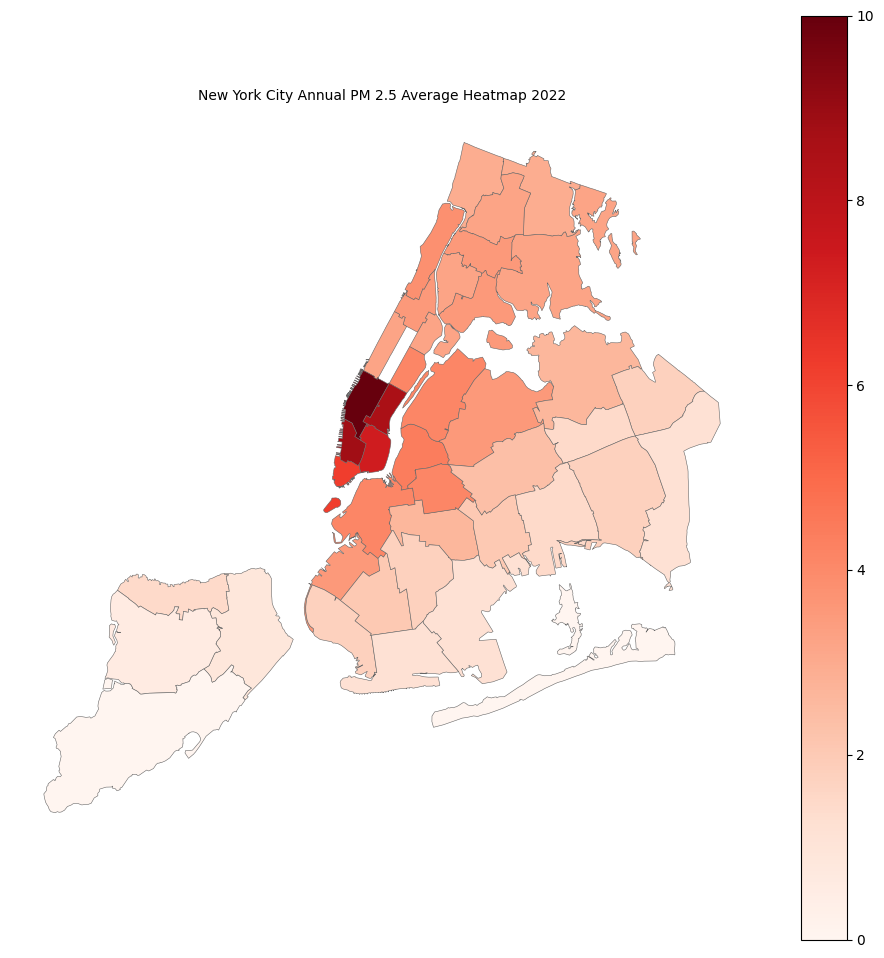

In [36]:
# Plotting 2022 annual averages on a heatmap
fig, ax = plt.subplots(1, figsize=(12, 12))
plt.xticks(rotation=90)
pm_25_map_2022_a.plot(column="pm_2.5_value", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=10))
bar_info._A = []
cbar = fig.colorbar(bar_info, ax=ax)
ax.axis("off")
ax.set_title('New York City Annual PM 2.5 Average Heatmap 2022', fontsize=10)
plt.show()

In [37]:
# Looking at Summer 2022 stats
pm_25_map_2022_s = pm_25_map_stats[(pm_25_map_stats['year'] == 2022) & (pm_25_map_stats['period'] == 'Summer')]
pm_25_map_2022_s.describe()

,OBJECTID,UHFCODE,SHAPE_Leng,SHAPE_Area,uhf_id,pm_2.5_value,year,start_date
count,42.000000,42.000000,42.000000,4.200000e+01,42.000000,42.000000,42.0,42
mean,22.500000,288.428571,88182.975517,1.926196e+08,288.428571,6.735714,2022.0,2022-06-01 00:00:00
min,2.000000,101.000000,34713.209340,3.513227e+07,101.000000,5.500000,2022.0,2022-06-01 00:00:00
25%,12.250000,204.250000,54909.183178,1.003734e+08,204.250000,6.200000,2022.0,2022-06-01 00:00:00
50%,22.500000,303.500000,72707.110045,1.624591e+08,303.500000,6.900000,2022.0,2022-06-01 00:00:00
75%,32.750000,403.750000,110187.483338,2.656142e+08,403.750000,7.100000,2022.0,2022-06-01 00:00:00
max,43.000000,504.000000,250903.372273,7.311307e+08,504.000000,8.300000,2022.0,2022-06-01 00:00:00
std,12.267844,124.589304,47105.811803,1.383875e+08,124.589304,0.656235,0.0,NaN


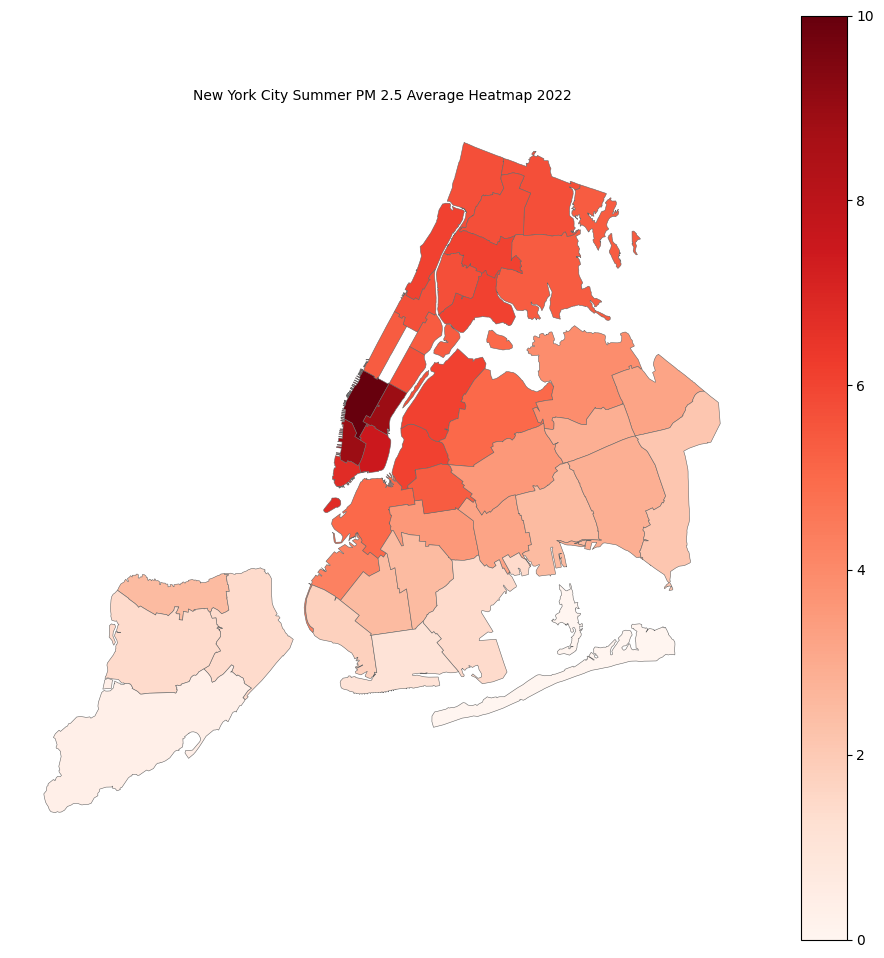

In [38]:
# Plotting a heatmap
fig, ax = plt.subplots(1, figsize=(12, 12))
plt.xticks(rotation=90)
pm_25_map_2022_s.plot(column="pm_2.5_value", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=10))
bar_info._A = []
cbar = fig.colorbar(bar_info, ax=ax)
ax.axis("off")
ax.set_title('New York City Summer PM 2.5 Average Heatmap 2022', fontsize=10)
plt.show()

We can observe from these visuals that the average PM 2.5 levels were higher in the Summer of 2022 than for the year overall.

### Power BI Dashboard

I loaded the PM 2.5 dataframe into Power BI after exporting it as a CSV file to create a dashboard highlighting trends and statistics regarding PM 2.5 levels across all New York Neighborhoods. The screenshot of the dashboard can be seen below:

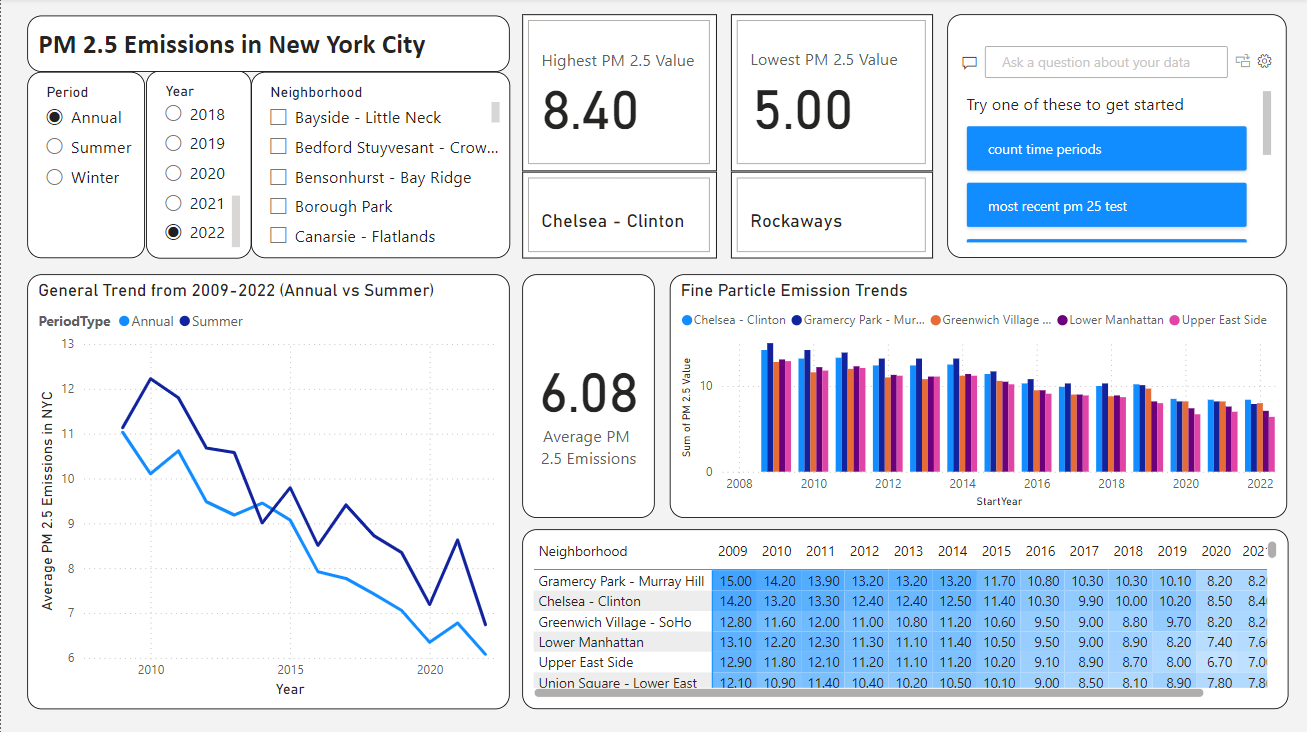

The dashboard has various features such as slicers for choosing the year, period and neighborhoods, as well as a line graph to show the general trend of annual and summer statistics in NYC from 2009-2022, offering a nice comparison between the two trends. We can see here that PM2.5 level in the summer is generally higher on average than annual average of the same year. We can also see a comparison between the highest PM2.5 levels for each year and the corresponding neighborhoods in the form of a clustered column chart. The matrix chart below shows all the neighborhoods annual/summer average stats (depending on the period slicer selection) for each year and conditional formatting indicating the overall decreasing trend.

The highest, lowest and average PM2.5 emissions are linked to the year slicer and also update if neighborhoods are picked for comparison. And a Q&A visual is added to the top right for any natural language questions one would like to ask of the data and it will respond in the form of a visual.

### Health outcomes related to PM2.5

As stated earlier, PM2.5 can cause a host of respiratory and cardiovascular issues and in extreme cases even death. The air quality dataset obtained from the NYC open data website has data for the following: 
1. Asthma emergency department visits due to PM2.5 (under 18)
2. Asthma emergency department visits due to PM2.5 (over 18)
3. Respiratory hospitalizations due to PM2.5 (age 20+)
4. Cardiovascular hospitalizations due to PM2.5 (age 40+)
5. Deaths due to PM2.5 (30+)

The rates were measured over three year periods: 2005-2009, 2009-2011, 2012-2014, 2015-2017 and 2017-2019. The values are in "per 100,000 people".

The data in this dataset is saved in such a way that there is a separate entry for each health outcome indicator and each year period. E.g. for Deaths due to PM2.5 for a certain neighborhood in the period of 2009-2011, there is a separate row with its value. 

We will be creating a pivot table for all this information in a way that for each specific time period and neighborhood, instead of having one value of one indicator, each indicator will have its own column. That way we will summarize the dataset and be able to create an interesting visual where we will observe the correlation between PM2.5 levels and health outcomes.

### Preparing the Pivot Table

In [39]:
df.head()

,unique_id,indicator_id,indicator_name,measure,unit,uhf_id,neighborhood,time_period,start_date,value
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,409,Southeast Queens,2015,01/01/2015,0.3
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,209,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,209,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,409,Southeast Queens,Annual Average 2012,12/01/2011,8.0
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,409,Southeast Queens,Summer 2022,06/01/2022,6.1


Earlier, we observed that there are two different indicators for asthma emergency visits, one for under 18s, one for over 18s. Let's display that result here again:

In [40]:
# Display indicator names along with their IDs
df_selected = df[['indicator_id','indicator_name','measure']]
df_selected.drop_duplicates(subset='indicator_id').sort_values(by='indicator_id')

,indicator_id,indicator_name,measure
2,365,Fine particles (PM 2.5),Mean
26,375,Nitrogen dioxide (NO2),Mean
723,386,Ozone (O3),Mean
10100,639,Deaths due to PM2.5,Estimated annual rate (age 30+)
0,640,Boiler Emissions- Total SO2 Emissions,Number per km2
4553,641,Boiler Emissions- Total PM2.5 Emissions,Number per km2
4489,642,Boiler Emissions- Total NOx Emissions,Number per km2
745,643,Annual vehicle miles traveled,Million miles
11144,644,Annual vehicle miles traveled (cars),Million miles
11130,645,Annual vehicle miles traveled (trucks),Million miles


We can see from this result that for visits by patients under 18 (as displayed in the measure column), the corresponding indicator_id is 648 and for patients over 18, it is 657. Therefore we will use both these indictor IDs and create a pivot table where there will be a separate column for each:

In [41]:
# Create a new DataFrame with Asthma emergency visits data. We'll name it df_asthma so we can recognize it easily
df_asthma = df[(df['indicator_id'] == 648) | (df['indicator_id'] == 657)]

In [42]:
# Create a pivot table from this DF
pivot_asthma = df_asthma.pivot_table(index=['uhf_id', 'neighborhood', 'time_period', 'start_date'],
                                                   columns='measure', values='value')
# Renaming the two new columns
pivot_asthma.columns = ['asthma_emergency_18+', 'asthma_emergency_U18']
pivot_asthma = pivot_asthma.reset_index()

In [43]:
pivot_asthma.head()

,uhf_id,neighborhood,time_period,start_date,asthma_emergency_18+,asthma_emergency_U18
0,101,Kingsbridge - Riverdale,2005-2007,01/01/2005,36.7,88.3
1,101,Kingsbridge - Riverdale,2009-2011,01/01/2009,25.4,60.7
2,101,Kingsbridge - Riverdale,2012-2014,01/02/2012,27.1,82.3
3,101,Kingsbridge - Riverdale,2015-2017,01/01/2015,25.8,65.8
4,101,Kingsbridge - Riverdale,2017-2019,01/01/2017,16.0,48.0


Success! Now let's prepare the other pivot tables so we can merge them all in the end.

Next up, we have respiratory hospitalizations due to PM2.5:

In [44]:
df_resp = df[(df['indicator_id'] == 650)]
pivot_resp = df_resp.pivot_table(index=['uhf_id', 'neighborhood', 'time_period', 'start_date'], columns='indicator_name',values='value')
pivot_resp.columns = ['respiratory_hosp_20+']
pivot_resp = pivot_resp.reset_index()
pivot_resp = pivot_resp.drop(columns='start_date')

In [45]:
pivot_resp.head()

,uhf_id,neighborhood,time_period,respiratory_hosp_20+
0,101,Kingsbridge - Riverdale,2005-2007,28.5
1,101,Kingsbridge - Riverdale,2009-2011,18.6
2,101,Kingsbridge - Riverdale,2012-2014,13.8
3,101,Kingsbridge - Riverdale,2015-2017,14.8
4,101,Kingsbridge - Riverdale,2017-2019,9.0


Now we'll do the same for data for cardiovascular hospitalizations and deaths:

In [46]:
# Cardio data pivot table
df_cardio = df[df['indicator_id'] == 651]
pivot_cardio = df_cardio.pivot_table(index=['uhf_id', 'neighborhood', 'time_period', 'start_date'],
                                     columns='indicator_name', values='value')
pivot_cardio.columns = ['cardio_hosp_40+']
pivot_cardio = pivot_cardio.reset_index()
pivot_cardio = pivot_cardio.drop(columns='start_date')

# Deaths data pivot table
df_deaths = df[df['indicator_id'] == 639]
pivot_deaths = df_deaths.pivot_table(index=['uhf_id', 'neighborhood', 'time_period', 'start_date'],
                                     columns='indicator_name', values='value')
pivot_deaths.columns = ['deaths_30+']
pivot_deaths = pivot_deaths.reset_index()
pivot_deaths = pivot_deaths.drop(columns='start_date')

In [47]:
pivot_cardio.head()

,uhf_id,neighborhood,time_period,cardio_hosp_40+
0,101,Kingsbridge - Riverdale,2005-2007,28.2
1,101,Kingsbridge - Riverdale,2009-2011,18.3
2,101,Kingsbridge - Riverdale,2012-2014,14.0
3,101,Kingsbridge - Riverdale,2015-2017,18.2
4,101,Kingsbridge - Riverdale,2017-2019,10.0


In [48]:
pivot_deaths.head()

,uhf_id,neighborhood,time_period,deaths_30+
0,101,Kingsbridge - Riverdale,2005-2007,117.7
1,101,Kingsbridge - Riverdale,2009-2011,77.6
2,101,Kingsbridge - Riverdale,2012-2014,69.4
3,101,Kingsbridge - Riverdale,2015-2017,63.0
4,101,Kingsbridge - Riverdale,2017-2019,50.0


In order to have a good understanding and see any correlation between PM2.5 levels and health outcomes, we will calculate three-year means of PM2.5 levels and merge that to our final pivot table as well. So let's get those averages.

(Since we don't have data for any date before 2009, we will not be able to calculate average for 2005-2007. But we will be able to calculate for the other ranges.)

In [49]:
df_pm25.head()

,uhf_id,neighborhood,pm_2.5_value,year,period,start_date
2,209,Bensonhurst - Bay Ridge,8.6,2012,Annual,2011-12-01
3,409,Southeast Queens,8.0,2012,Annual,2011-12-01
4,409,Southeast Queens,6.1,2022,Summer,2022-06-01
5,209,Bensonhurst - Bay Ridge,10.0,2012,Summer,2012-06-01
6,209,Bensonhurst - Bay Ridge,9.8,2013,Summer,2013-06-01


We have the existing df_pm25 dataframe which we can use to get the three year means. Since we need the annual averages for those, we will only select "Annual" in period.

In [50]:
df_pm25_annual = df_pm25[df_pm25['period'] == 'Annual']

In [51]:
df_pm25_annual.head(10)

,uhf_id,neighborhood,pm_2.5_value,year,period,start_date
2,209,Bensonhurst - Bay Ridge,8.6,2012,Annual,2011-12-01
3,409,Southeast Queens,8.0,2012,Annual,2011-12-01
10,209,Bensonhurst - Bay Ridge,8.2,2013,Annual,2012-12-01
11,210,Coney Island - Sheepshead Bay,8.1,2013,Annual,2012-12-01
12,409,Southeast Queens,6.8,2017,Annual,2017-01-01
13,210,Coney Island - Sheepshead Bay,6.8,2017,Annual,2017-01-01
15,209,Bensonhurst - Bay Ridge,7.1,2017,Annual,2017-01-01
22,209,Bensonhurst - Bay Ridge,7.1,2016,Annual,2015-12-31
24,410,Rockaways,6.0,2016,Annual,2015-12-31
34,211,Williamsburg - Bushwick,9.7,2012,Annual,2011-12-01


In [52]:
df_pm25_annual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 2 to 17790
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uhf_id        588 non-null    int64         
 1   neighborhood  588 non-null    object        
 2   pm_2.5_value  588 non-null    float64       
 3   year          588 non-null    int64         
 4   period        588 non-null    object        
 5   start_date    588 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 32.2+ KB


With the following block of code, we will calculate average PM2.5 values for relevant time periods and store in a new DataFrame.

In [53]:
# Defining the year periods, we will check the years in DF against the years in this dictionary
year_periods = {
        '2009-2011': [2009, 2010, 2011],
        '2012-2014': [2012, 2013, 2014],
        '2015-2017': [2015, 2016, 2017],
        '2017-2019': [2017, 2018, 2019],
    }

# Empty list
agg_data = []

# Looping over the dictionary
for period, years in year_periods.items():
    period_data = df_pm25_annual[df_pm25_annual['year'].isin(years)].copy() # filtering relevant years 
    period_data['time_period'] = period # add time period column
    average_values = period_data.groupby(['uhf_id', 'neighborhood'])['pm_2.5_value'].mean().reset_index() # calculating the mean
    average_values['time_period'] = period
    agg_data.append(average_values) # appending the dataframes to a list
pm25_agg_df = pd.concat(agg_data, ignore_index=True) # finally concatenating to form a single dataframe

In [54]:
# Checking if the resulting DataFrame is as expected
pm25_agg_df.head(10)

,uhf_id,neighborhood,pm_2.5_value,time_period
0,101,Kingsbridge - Riverdale,10.600000,2009-2011
1,102,Northeast Bronx,10.300000,2009-2011
2,103,Fordham - Bronx Pk,10.733333,2009-2011
3,104,Pelham - Throgs Neck,10.266667,2009-2011
4,105,Crotona -Tremont,11.433333,2009-2011
5,106,High Bridge - Morrisania,11.400000,2009-2011
6,107,Hunts Point - Mott Haven,11.066667,2009-2011
7,201,Greenpoint,11.333333,2009-2011
8,202,Downtown - Heights - Slope,11.033333,2009-2011
9,203,Bedford Stuyvesant - Crown Heights,10.333333,2009-2011


Great! Now we have all the pivot tables and dataframes needed to create our final table. Let's get to it.

In [55]:
# Merge asthma and respiratory hospitalizations pivot tables
m_1 = pd.merge(pivot_asthma, pivot_resp, on=['uhf_id', 'neighborhood', 'time_period'], how='left')

In [56]:
# Check if everything is okay
m_1.head()

,uhf_id,neighborhood,time_period,start_date,asthma_emergency_18+,asthma_emergency_U18,respiratory_hosp_20+
0,101,Kingsbridge - Riverdale,2005-2007,01/01/2005,36.7,88.3,28.5
1,101,Kingsbridge - Riverdale,2009-2011,01/01/2009,25.4,60.7,18.6
2,101,Kingsbridge - Riverdale,2012-2014,01/02/2012,27.1,82.3,13.8
3,101,Kingsbridge - Riverdale,2015-2017,01/01/2015,25.8,65.8,14.8
4,101,Kingsbridge - Riverdale,2017-2019,01/01/2017,16.0,48.0,9.0


In [57]:
# Continue merging
m_2 = pd.merge(m_1, pivot_cardio, on=['uhf_id', 'neighborhood', 'time_period'], how='left')

In [58]:
m_3 = pd.merge(m_2, pivot_deaths, on=['uhf_id', 'neighborhood', 'time_period'], how='left')

In [59]:
m_4 = pd.merge(m_3, pm25_agg_df, on=['uhf_id', 'neighborhood', 'time_period'], how='left')

In [60]:
# Dropping all the rows for which we have no pm2.5 average values (2005-2009)
pm25_pivot = m_4.dropna(subset=['pm_2.5_value'])

All done! Let's take a look at our final pivot table:

In [61]:
pm25_pivot.head(10)

,uhf_id,neighborhood,time_period,start_date,asthma_emergency_18+,asthma_emergency_U18,respiratory_hosp_20+,cardio_hosp_40+,deaths_30+,pm_2.5_value
1,101,Kingsbridge - Riverdale,2009-2011,01/01/2009,25.4,60.7,18.6,18.3,77.6,10.600000
2,101,Kingsbridge - Riverdale,2012-2014,01/02/2012,27.1,82.3,13.8,14.0,69.4,9.066667
3,101,Kingsbridge - Riverdale,2015-2017,01/01/2015,25.8,65.8,14.8,18.2,63.0,8.033333
4,101,Kingsbridge - Riverdale,2017-2019,01/01/2017,16.0,48.0,9.0,10.0,50.0,7.033333
6,102,Northeast Bronx,2009-2011,01/01/2009,37.6,73.4,18.6,16.2,57.0,10.300000
7,102,Northeast Bronx,2012-2014,01/02/2012,57.7,139.9,14.2,13.0,47.9,8.933333
8,102,Northeast Bronx,2015-2017,01/01/2015,48.4,108.6,15.4,18.5,47.3,8.066667
9,102,Northeast Bronx,2017-2019,01/01/2017,36.0,81.0,10.0,10.0,39.0,7.066667
11,103,Fordham - Bronx Pk,2009-2011,01/01/2009,68.7,122.8,20.5,18.8,49.6,10.733333
12,103,Fordham - Bronx Pk,2012-2014,01/02/2012,77.6,191.4,17.1,14.5,43.5,9.266667


In [62]:
pm25_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1 to 209
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uhf_id                168 non-null    int64  
 1   neighborhood          168 non-null    object 
 2   time_period           168 non-null    object 
 3   start_date            168 non-null    object 
 4   asthma_emergency_18+  168 non-null    float64
 5   asthma_emergency_U18  168 non-null    float64
 6   respiratory_hosp_20+  168 non-null    float64
 7   cardio_hosp_40+       168 non-null    float64
 8   deaths_30+            168 non-null    float64
 9   pm_2.5_value          168 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 14.4+ KB


### Visualizing PM2.5 levels vs. health outcomes

We successfully managed to summarize the data in an efficient way that gives us a lot more information at a glance and will also help us visualize this data in Power BI which we will do next. 

Using a line and clustered column chart in Power BI, we can visualize the data. The reason behind picking this chart type is we will be comparing values with different units over the same x-axis i.e. time period. The health outcomes indicators are displayed as bars and the line indicates PM2.5 values.

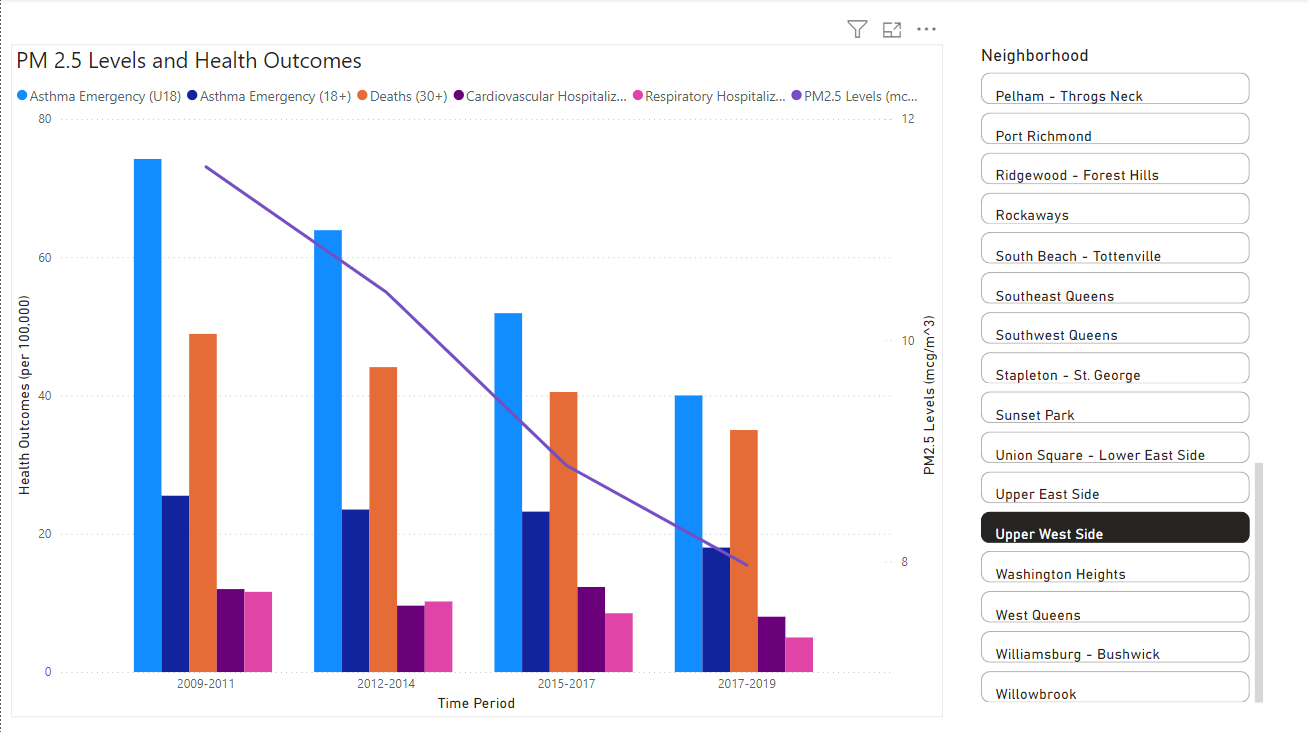

A neighborhood slicer is also used in order to select the desired neighborhood and visualize their PM2.5 levels over time vs. health outcomes.

Picking 3 neighborhoods at random and sharing their graphs here: 

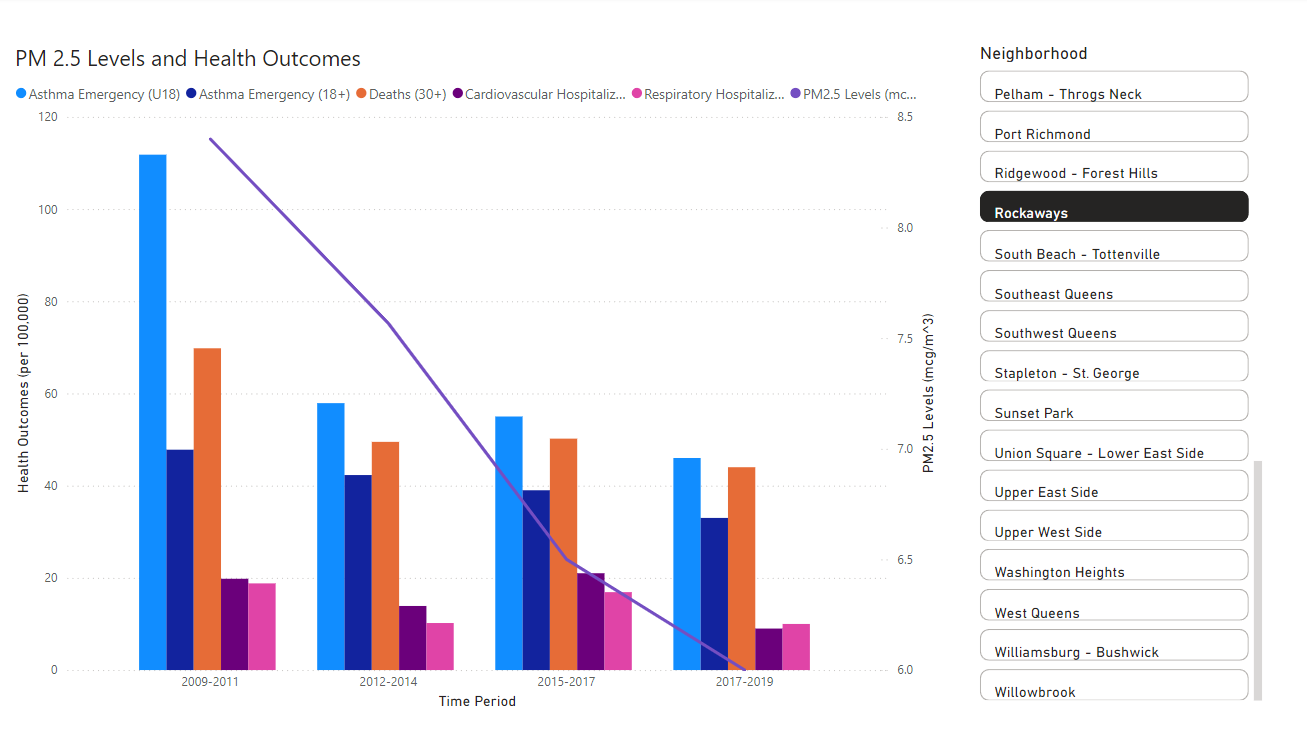
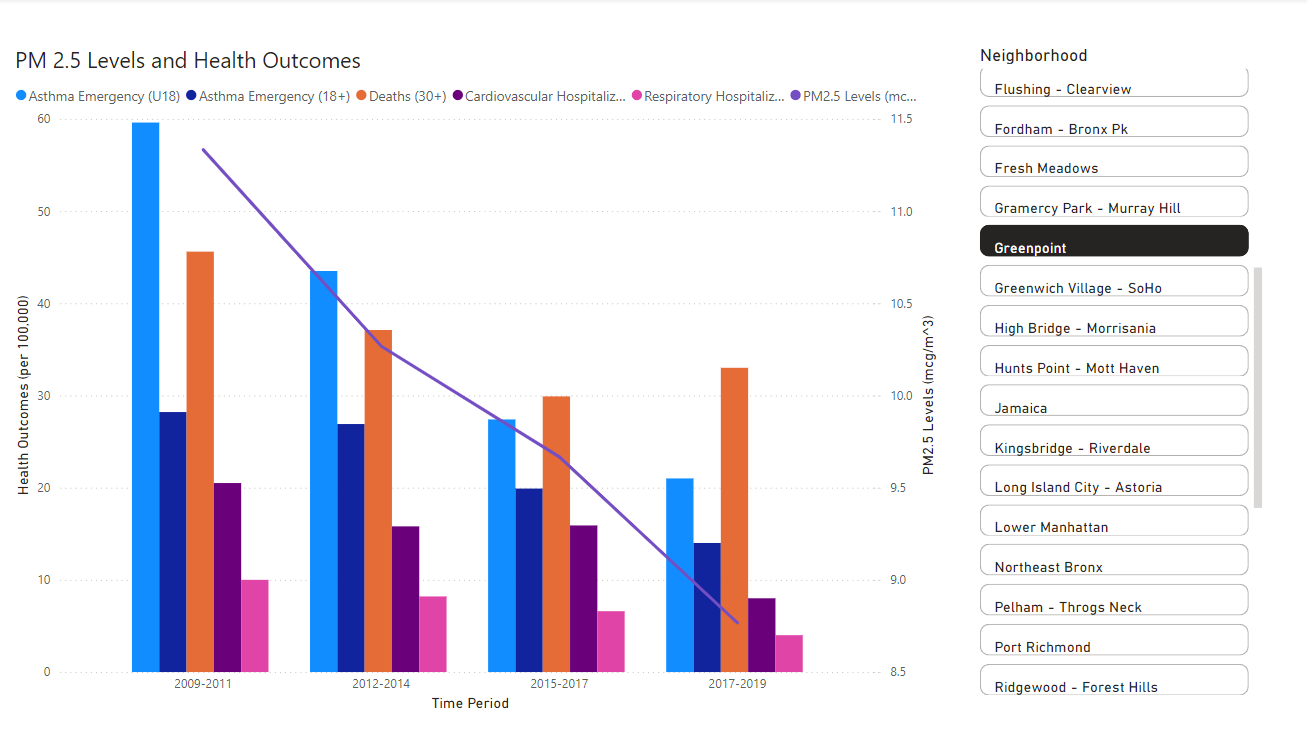
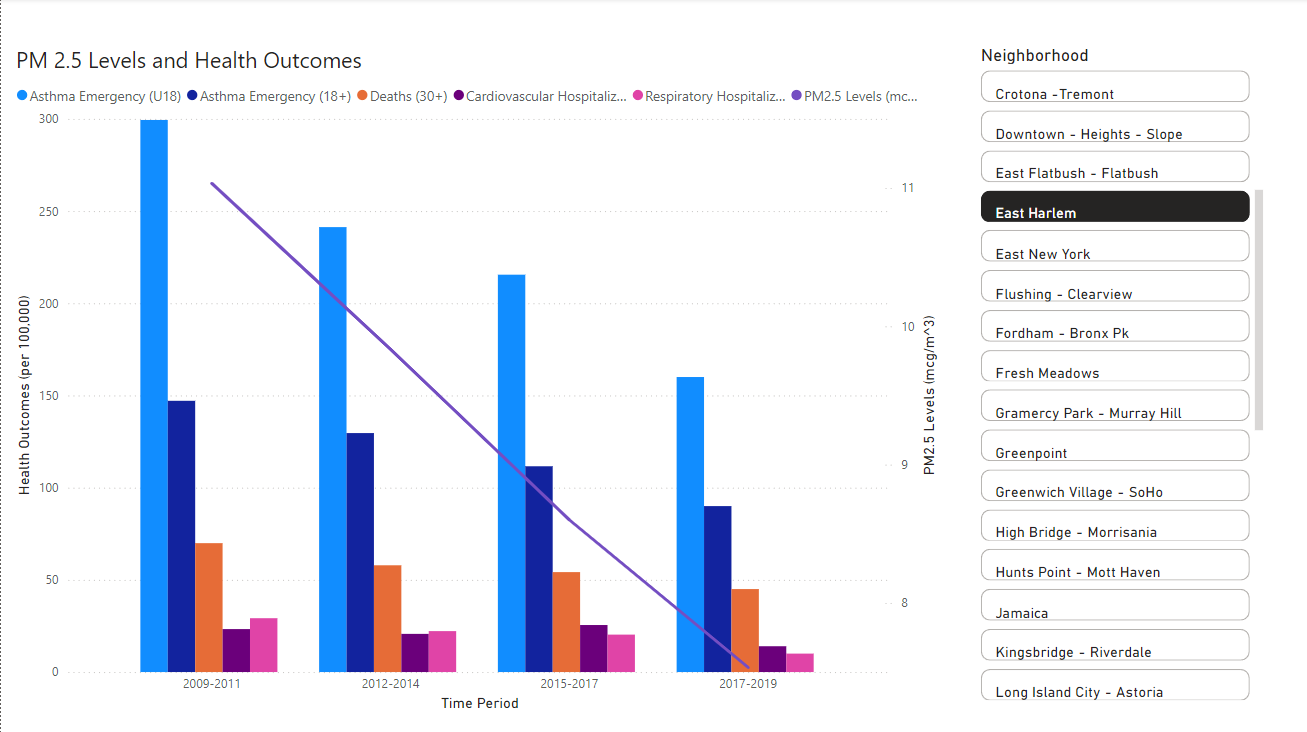

We can see from these graphs that with the general decrease in PM2.5 levels in the neighborhoods in NYC and can also observe a general decrease in asthma emergency hospital visits, respiratory and cardiovascular hospitalizations, and deaths.

### Conclusion and Recommendations

As per our analysis, we observed that the PM2.5 levels have been lowering since 2009 and are now within the recommended threshold. We also observed that overall health related events due to PM2.5 are also on the decline, showing that better air quality is leading to better outcomes for the people of NYC.

Although the latest data available is for the year 2022, if we were to offer recommendations for how we can maintain/improve PM2.5 levels:

1. Implement strict emissions standards for vehicles and industrial activities.
2. Invest in urban greening projects. They not only beautify urban spaces but also play an important role in absorbing pollutants.
3. Spread awareness. Public awareness campaigns are crucial in order to highlight topics such as pollution and instigate behavioral change. Simple actions like using public transportation, carpooling, and reducing energy consumption can significantly impact PM 2.5 levels.